<a href="https://colab.research.google.com/github/aashrithresearch/retinal-disease-detector/blob/main/resnet101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle -q

In [2]:
from fastai.vision.all import *
from fastai.callback.fp16 import *
import torch
import os

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aashrithy","key":"f62ff5af191bbbb6f7d19b80dc67c84b"}'}

In [4]:
!mkdir ~/.kaggle

!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download 'gunavenkatdoddi/preprocessed-eye-diseases-fundus-images'

Dataset URL: https://www.kaggle.com/datasets/gunavenkatdoddi/preprocessed-eye-diseases-fundus-images
License(s): ODbL-1.0
100% 472M/472M [00:16<00:00, 33.7MB/s]
100% 472M/472M [00:16<00:00, 29.4MB/s]


In [6]:
!unzip ./preprocessed-eye-diseases-fundus-images.zip -d /content

Archive:  ./preprocessed-eye-diseases-fundus-images.zip
  inflating: /content/seg_dataset/cataract/0_left.jpg  
  inflating: /content/seg_dataset/cataract/103_left.jpg  
  inflating: /content/seg_dataset/cataract/1062_right.jpg  
  inflating: /content/seg_dataset/cataract/1083_left.jpg  
  inflating: /content/seg_dataset/cataract/1084_right.jpg  
  inflating: /content/seg_dataset/cataract/1102_left.jpg  
  inflating: /content/seg_dataset/cataract/1102_right.jpg  
  inflating: /content/seg_dataset/cataract/1115_left.jpg  
  inflating: /content/seg_dataset/cataract/1126_right.jpg  
  inflating: /content/seg_dataset/cataract/112_right.jpg  
  inflating: /content/seg_dataset/cataract/1144_left.jpg  
  inflating: /content/seg_dataset/cataract/1144_right.jpg  
  inflating: /content/seg_dataset/cataract/1164_left.jpg  
  inflating: /content/seg_dataset/cataract/1167_right.jpg  
  inflating: /content/seg_dataset/cataract/119_left.jpg  
  inflating: /content/seg_dataset/cataract/1285_left.jpg  

In [7]:
! kaggle datasets download 'sovitrath/diabetic-retinopathy-224x224-2019-data'

Dataset URL: https://www.kaggle.com/datasets/sovitrath/diabetic-retinopathy-224x224-2019-data
License(s): CC0-1.0
100% 237M/238M [00:09<00:00, 31.4MB/s]
100% 238M/238M [00:09<00:00, 25.2MB/s]


In [8]:
! unzip ./diabetic-retinopathy-224x224-2019-data.zip -d /content

Archive:  ./diabetic-retinopathy-224x224-2019-data.zip
  inflating: /content/colored_images/Mild/0024cdab0c1e.png  
  inflating: /content/colored_images/Mild/00cb6555d108.png  
  inflating: /content/colored_images/Mild/0124dffecf29.png  
  inflating: /content/colored_images/Mild/01b3aed3ed4c.png  
  inflating: /content/colored_images/Mild/0369f3efe69b.png  
  inflating: /content/colored_images/Mild/03e25101e8e8.png  
  inflating: /content/colored_images/Mild/04ac765f91a1.png  
  inflating: /content/colored_images/Mild/059bc89df7f4.png  
  inflating: /content/colored_images/Mild/05a5183c92d0.png  
  inflating: /content/colored_images/Mild/0684311afdfc.png  
  inflating: /content/colored_images/Mild/06b71823f9cd.png  
  inflating: /content/colored_images/Mild/07929d32b5b3.png  
  inflating: /content/colored_images/Mild/07a1c7073982.png  
  inflating: /content/colored_images/Mild/086d41d17da8.png  
  inflating: /content/colored_images/Mild/09935d72892b.png  
  inflating: /content/colored_

In [9]:
! kaggle datasets download 'hindsaud/datasets-higancnn-glaucoma-detection'

Dataset URL: https://www.kaggle.com/datasets/hindsaud/datasets-higancnn-glaucoma-detection
License(s): unknown
100% 378M/380M [00:15<00:00, 28.4MB/s]
100% 380M/380M [00:15<00:00, 26.3MB/s]


In [10]:
! unzip ./datasets-higancnn-glaucoma-detection.zip -d /content

Streaming output truncated to the last 5000 lines.
  inflating: /content/Datasets/Rim-One/Glaucoma/train-38001.png  
  inflating: /content/Datasets/Rim-One/Glaucoma/train-38002.png  
  inflating: /content/Datasets/Rim-One/Glaucoma/train-38003.png  
  inflating: /content/Datasets/Rim-One/Glaucoma/train-38004.png  
  inflating: /content/Datasets/Rim-One/Glaucoma/train-38005.png  
  inflating: /content/Datasets/Rim-One/Glaucoma/train-38006.png  
  inflating: /content/Datasets/Rim-One/Glaucoma/train-38007.png  
  inflating: /content/Datasets/Rim-One/Glaucoma/train-38008.png  
  inflating: /content/Datasets/Rim-One/Glaucoma/train-38009.png  
  inflating: /content/Datasets/Rim-One/Glaucoma/train-38010.png  
  inflating: /content/Datasets/Rim-One/Glaucoma/train-38011.png  
  inflating: /content/Datasets/Rim-One/Glaucoma/train-38012.png  
  inflating: /content/Datasets/Rim-One/Glaucoma/train-38013.png  
  inflating: /content/Datasets/Rim-One/Glaucoma/train-38014.png  
  inflating: /content/Dat

In [11]:
import shutil

source = '/content/Datasets/Acrima/Glaucoma'
destination = '/content/colored_images'
shutil.move(source, destination)

'/content/colored_images/Glaucoma'

In [12]:
source = '/content/seg_dataset/cataract'
destination = '/content/colored_images'
shutil.move(source, destination)

'/content/colored_images/cataract'

In [13]:
import os

old_name = '/content/colored_images/Moderate'
new_name = '/content/colored_images/Moderate DR'
os.rename(old_name, new_name)

old_name = '/content/colored_images/Mild'
new_name = '/content/colored_images/Mild DR'
os.rename(old_name, new_name)

old_name = '/content/colored_images/No_DR'
new_name = '/content/colored_images/Normal Eyes'
os.rename(old_name, new_name)

In [14]:
fnames = '/content/colored_images'

In [15]:
print(os.listdir(fnames))

['Moderate DR', 'Severe', 'Mild DR', 'cataract', 'Proliferate_DR', 'Glaucoma', 'Normal Eyes']


In [16]:
retinal = DataBlock(blocks = (ImageBlock, CategoryBlock),
                    get_items = get_image_files,
                    get_y = parent_label,
                    splitter = RandomSplitter(valid_pct = 0.2, seed=42),
                    item_tfms = Resize(460),
                    batch_tfms = aug_transforms(size=224, min_scale=0.75))
dls = retinal.dataloaders(fnames, bs=64)

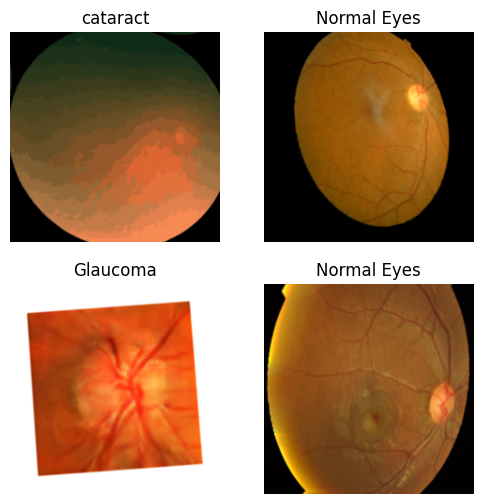

In [17]:
dls.show_batch(nrows=2, ncols=2)

In [22]:
metrics = [accuracy, RocAuc(average='macro')]
learn101 = vision_learner(dls, resnet101, metrics=metrics).to_fp16()

Downloading: "https://download.pytorch.org/models/resnet101-cd907fc2.pth" to /root/.cache/torch/hub/checkpoints/resnet101-cd907fc2.pth
100%|██████████| 171M/171M [00:08<00:00, 20.4MB/s]


SuggestedLRs(valley=0.0010000000474974513)

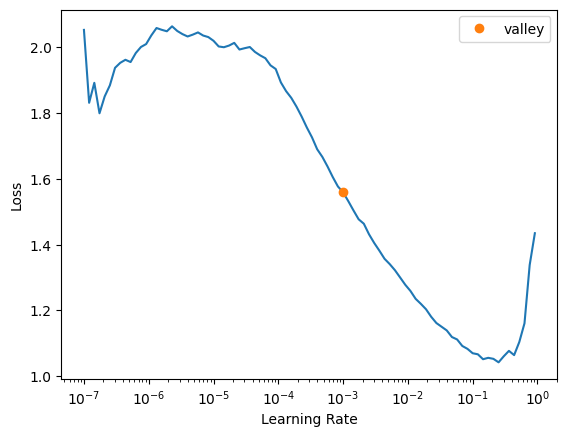

In [24]:
learn101.lr_find()

In [28]:
learn101.fit_one_cycle(10, 1e-3)

epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,0.715537,0.361334,0.875974,0.965229,01:10
1,0.531663,0.356120,0.887662,0.966846,01:07
2,0.415524,0.288313,0.903247,0.975066,01:05
3,0.365873,0.277208,0.898701,0.975236,01:08
4,0.311304,0.257514,0.912987,0.978011,01:06
5,0.304521,0.242868,0.912987,0.977844,01:08
6,0.260078,0.248673,0.910390,0.979629,01:06
7,0.243730,0.233704,0.916234,0.981112,01:08
8,0.224978,0.239320,0.915584,0.980493,01:05
9,0.229952,0.242005,0.911688,0.980685,01:07
